In [6]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [7]:
df=pd.read_csv("https://raw.githubusercontent.com/hrisikesh-neogi/credit-card-fraud-detection/main/notebooks/creditCardFraud_28011964_120214.csv")

In [8]:
df.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0      50000    1          2         1   57     -1      0     -1      0   
1      50000    1          1         2   37      0      0      0      0   
2     500000    1          1         2   29      0      0      0      0   
3     100000    2          2         2   23      0     -1     -1      0   
4     140000    2          3         1   28      0      0      2      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0      0  ...      20940      19146      19131      2000     36681     10000   
1      0  ...      19394      19619      20024      2500      1815       657   
2      0  ...     542653     483003     473944     55000     40000     38000   
3      0  ...        221       -159        567       380       601         0   
4      0  ...      12211      11793       3719      3329         0       432   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0      9000       689       679                           0  
1      1000      1000       800                           0  
2     20239     13750     13770                           0  
3       581      1687      1542                           0  
4      1000      1000      1000                           0  

[5 rows x 24 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   1001 non-null   int64
 1   SEX                         1001 non-null   int64
 2   EDUCATION                   1001 non-null   int64
 3   MARRIAGE                    1001 non-null   int64
 4   AGE                         1001 non-null   int64
 5   PAY_0                       1001 non-null   int64
 6   PAY_2                       1001 non-null   int64
 7   PAY_3                       1001 non-null   int64
 8   PAY_4                       1001 non-null   int64
 9   PAY_5                       1001 non-null   int64
 10  PAY_6                       1001 non-null   int64
 11  BILL_AMT1                   1001 non-null   int64
 12  BILL_AMT2                   1001 non-null   int64
 13  BILL_AMT3                   1001 non-null   int64
 14  BILL_AMT

In [10]:
df.describe()

LIMIT_BAL          SEX    EDUCATION     MARRIAGE          AGE  \
count    1001.000000  1001.000000  1001.000000  1001.000000  1001.000000   
mean   167532.467532     1.589411     1.776224     1.604396    34.945055   
std    130587.921320     0.492187     0.750916     0.532298     9.219760   
min     10000.000000     1.000000     1.000000     0.000000    21.000000   
25%     50000.000000     1.000000     1.000000     1.000000    28.000000   
50%    140000.000000     2.000000     2.000000     2.000000    33.000000   
75%    240000.000000     2.000000     2.000000     2.000000    41.000000   
max    700000.000000     2.000000     6.000000     3.000000    75.000000   

             PAY_0        PAY_2        PAY_3        PAY_4        PAY_5  ...  \
count  1001.000000  1001.000000  1001.000000  1001.000000  1001.000000  ...   
mean     -0.004995    -0.161838    -0.164835    -0.283716    -0.283716  ...   
std       1.173446     1.228732     1.262459     1.184662     1.170224  ...   
min      -2.000000    -2.000000    -2.000000    -2.000000    -2.000000  ...   
25%      -1.000000    -1.000000    -1.000000    -1.000000    -1.000000  ...   
50%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
max       8.000000     7.000000     7.000000     7.000000     7.000000  ...   

           BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count    1001.000000    1001.000000    1001.000000    1001.000000   
mean    40748.408591   39078.666334   38012.011988    5382.339660   
std     68206.929510   63108.238729   63074.415024   12180.755275   
min     -3684.000000  -28335.000000 -339603.000000       0.000000   
25%      1423.000000    1206.000000     830.000000    1000.000000   
50%     17710.000000   17580.000000   15846.000000    2184.000000   
75%     48851.000000   46404.000000   46557.000000    5090.000000   
max    628699.000000  484612.000000  473944.000000  199646.000000   

            PAY_AMT2       PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count    1001.000000    1001.000000    1001.000000    1001.000000   
mean     5051.400599    4176.149850    4671.488511    5331.049950   
std     15626.153184   10514.647502   13269.943983   16812.536877   
min         0.000000       0.000000       0.000000       0.000000   
25%       390.000000     228.000000     148.000000     189.000000   
50%      1710.000000    1206.000000    1398.000000    1306.000000   
75%      4500.000000    3720.000000    4000.000000    3745.000000   
max    285138.000000  133657.000000  188840.000000  195599.000000   

            PAY_AMT6  default payment next month  
count    1001.000000                 1001.000000  
mean     5090.704296                    0.213786  
std     23658.888052                    0.410183  
min         0.000000                    0.000000  
25%         0.000000                    0.000000  
50%      1250.000000                    0.000000  
75%      3784.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 24 columns]

In [11]:
df.describe().T

count           mean            std       min  \
LIMIT_BAL                   1001.0  167532.467532  130587.921320   10000.0   
SEX                         1001.0       1.589411       0.492187       1.0   
EDUCATION                   1001.0       1.776224       0.750916       1.0   
MARRIAGE                    1001.0       1.604396       0.532298       0.0   
AGE                         1001.0      34.945055       9.219760      21.0   
PAY_0                       1001.0      -0.004995       1.173446      -2.0   
PAY_2                       1001.0      -0.161838       1.228732      -2.0   
PAY_3                       1001.0      -0.164835       1.262459      -2.0   
PAY_4                       1001.0      -0.283716       1.184662      -2.0   
PAY_5                       1001.0      -0.283716       1.170224      -2.0   
PAY_6                       1001.0      -0.314685       1.203276      -2.0   
BILL_AMT1                   1001.0   49386.738262   72657.966256  -14386.0   
BILL_AMT2                   1001.0   47879.345654   72090.718188  -13543.0   
BILL_AMT3                   1001.0   44925.682318   69545.948045   -9850.0   
BILL_AMT4                   1001.0   40748.408591   68206.929510   -3684.0   
BILL_AMT5                   1001.0   39078.666334   63108.238729  -28335.0   
BILL_AMT6                   1001.0   38012.011988   63074.415024 -339603.0   
PAY_AMT1                    1001.0    5382.339660   12180.755275       0.0   
PAY_AMT2                    1001.0    5051.400599   15626.153184       0.0   
PAY_AMT3                    1001.0    4176.149850   10514.647502       0.0   
PAY_AMT4                    1001.0    4671.488511   13269.943983       0.0   
PAY_AMT5                    1001.0    5331.049950   16812.536877       0.0   
PAY_AMT6                    1001.0    5090.704296   23658.888052       0.0   
default payment next month  1001.0       0.213786       0.410183       0.0   

                                25%       50%       75%       max  
LIMIT_BAL                   50000.0  140000.0  240000.0  700000.0  
SEX                             1.0       2.0       2.0       2.0  
EDUCATION                       1.0       2.0       2.0       6.0  
MARRIAGE                        1.0       2.0       2.0       3.0  
AGE                            28.0      33.0      41.0      75.0  
PAY_0                          -1.0       0.0       0.0       8.0  
PAY_2                          -1.0       0.0       0.0       7.0  
PAY_3                          -1.0       0.0       0.0       7.0  
PAY_4                          -1.0       0.0       0.0       7.0  
PAY_5                          -1.0       0.0       0.0       7.0  
PAY_6                          -1.0       0.0       0.0       7.0  
BILL_AMT1                    3128.0   21075.0   59901.0  507726.0  
BILL_AMT2                    3274.0   20400.0   58472.0  509229.0  
BILL_AMT3                    1940.0   19292.0   54477.0  499936.0  
BILL_AMT4                    1423.0   17710.0   48851.0  628699.0  
BILL_AMT5                    1206.0   17580.0   46404.0  484612.0  
BILL_AMT6                     830.0   15846.0   46557.0  473944.0  
PAY_AMT1                     1000.0    2184.0    5090.0  199646.0  
PAY_AMT2                      390.0    1710.0    4500.0  285138.0  
PAY_AMT3                      228.0    1206.0    3720.0  133657.0  
PAY_AMT4                      148.0    1398.0    4000.0  188840.0  
PAY_AMT5                      189.0    1306.0    3745.0  195599.0  
PAY_AMT6                        0.0    1250.0    3784.0  528666.0  
default payment next month      0.0       0.0       0.0       1.0

In [12]:
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [13]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
996     False
997     False
998     False
999     False
1000    False
Length: 1001, dtype: bool

In [14]:
df.skew()

LIMIT_BAL                      1.011019
SEX                           -0.364047
EDUCATION                      0.875019
MARRIAGE                      -0.104653
AGE                            0.817570
PAY_0                          1.509158
PAY_2                          1.208410
PAY_3                          1.226851
PAY_4                          1.217037
PAY_5                          1.053218
PAY_6                          1.064620
BILL_AMT1                      2.671027
BILL_AMT2                      2.777126
BILL_AMT3                      2.901497
BILL_AMT4                      3.578203
BILL_AMT5                      3.107180
BILL_AMT6                      2.636691
PAY_AMT1                       7.749893
PAY_AMT2                      10.752948
PAY_AMT3                       6.744377
PAY_AMT4                       7.454775
PAY_AMT5                       7.034632
PAY_AMT6                      15.241538
default payment next month     1.398337
dtype: float64

In [15]:
X=df.drop("default payment next month" , axis=1)

In [16]:
X.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0      50000    1          2         1   57     -1      0     -1      0   
1      50000    1          1         2   37      0      0      0      0   
2     500000    1          1         2   29      0      0      0      0   
3     100000    2          2         2   23      0     -1     -1      0   
4     140000    2          3         1   28      0      0      2      0   

   PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0      0  ...      35835      20940      19146      19131      2000     36681   
1      0  ...      57608      19394      19619      20024      2500      1815   
2      0  ...     445007     542653     483003     473944     55000     40000   
3      0  ...        601        221       -159        567       380       601   
4      0  ...      12108      12211      11793       3719      3329         0   

   PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0     10000      9000       689       679  
1       657      1000      1000       800  
2     38000     20239     13750     13770  
3         0       581      1687      1542  
4       432      1000      1000      1000  

[5 rows x 23 columns]

In [17]:
X.shape

(1001, 23)

In [18]:
y=df["default payment next month"]

In [19]:
y

0       0
1       0
2       0
3       0
4       0
       ..
996     0
997     0
998     0
999     1
1000    1
Name: default payment next month, Length: 1001, dtype: int64

In [20]:
y.shape

(1001,)

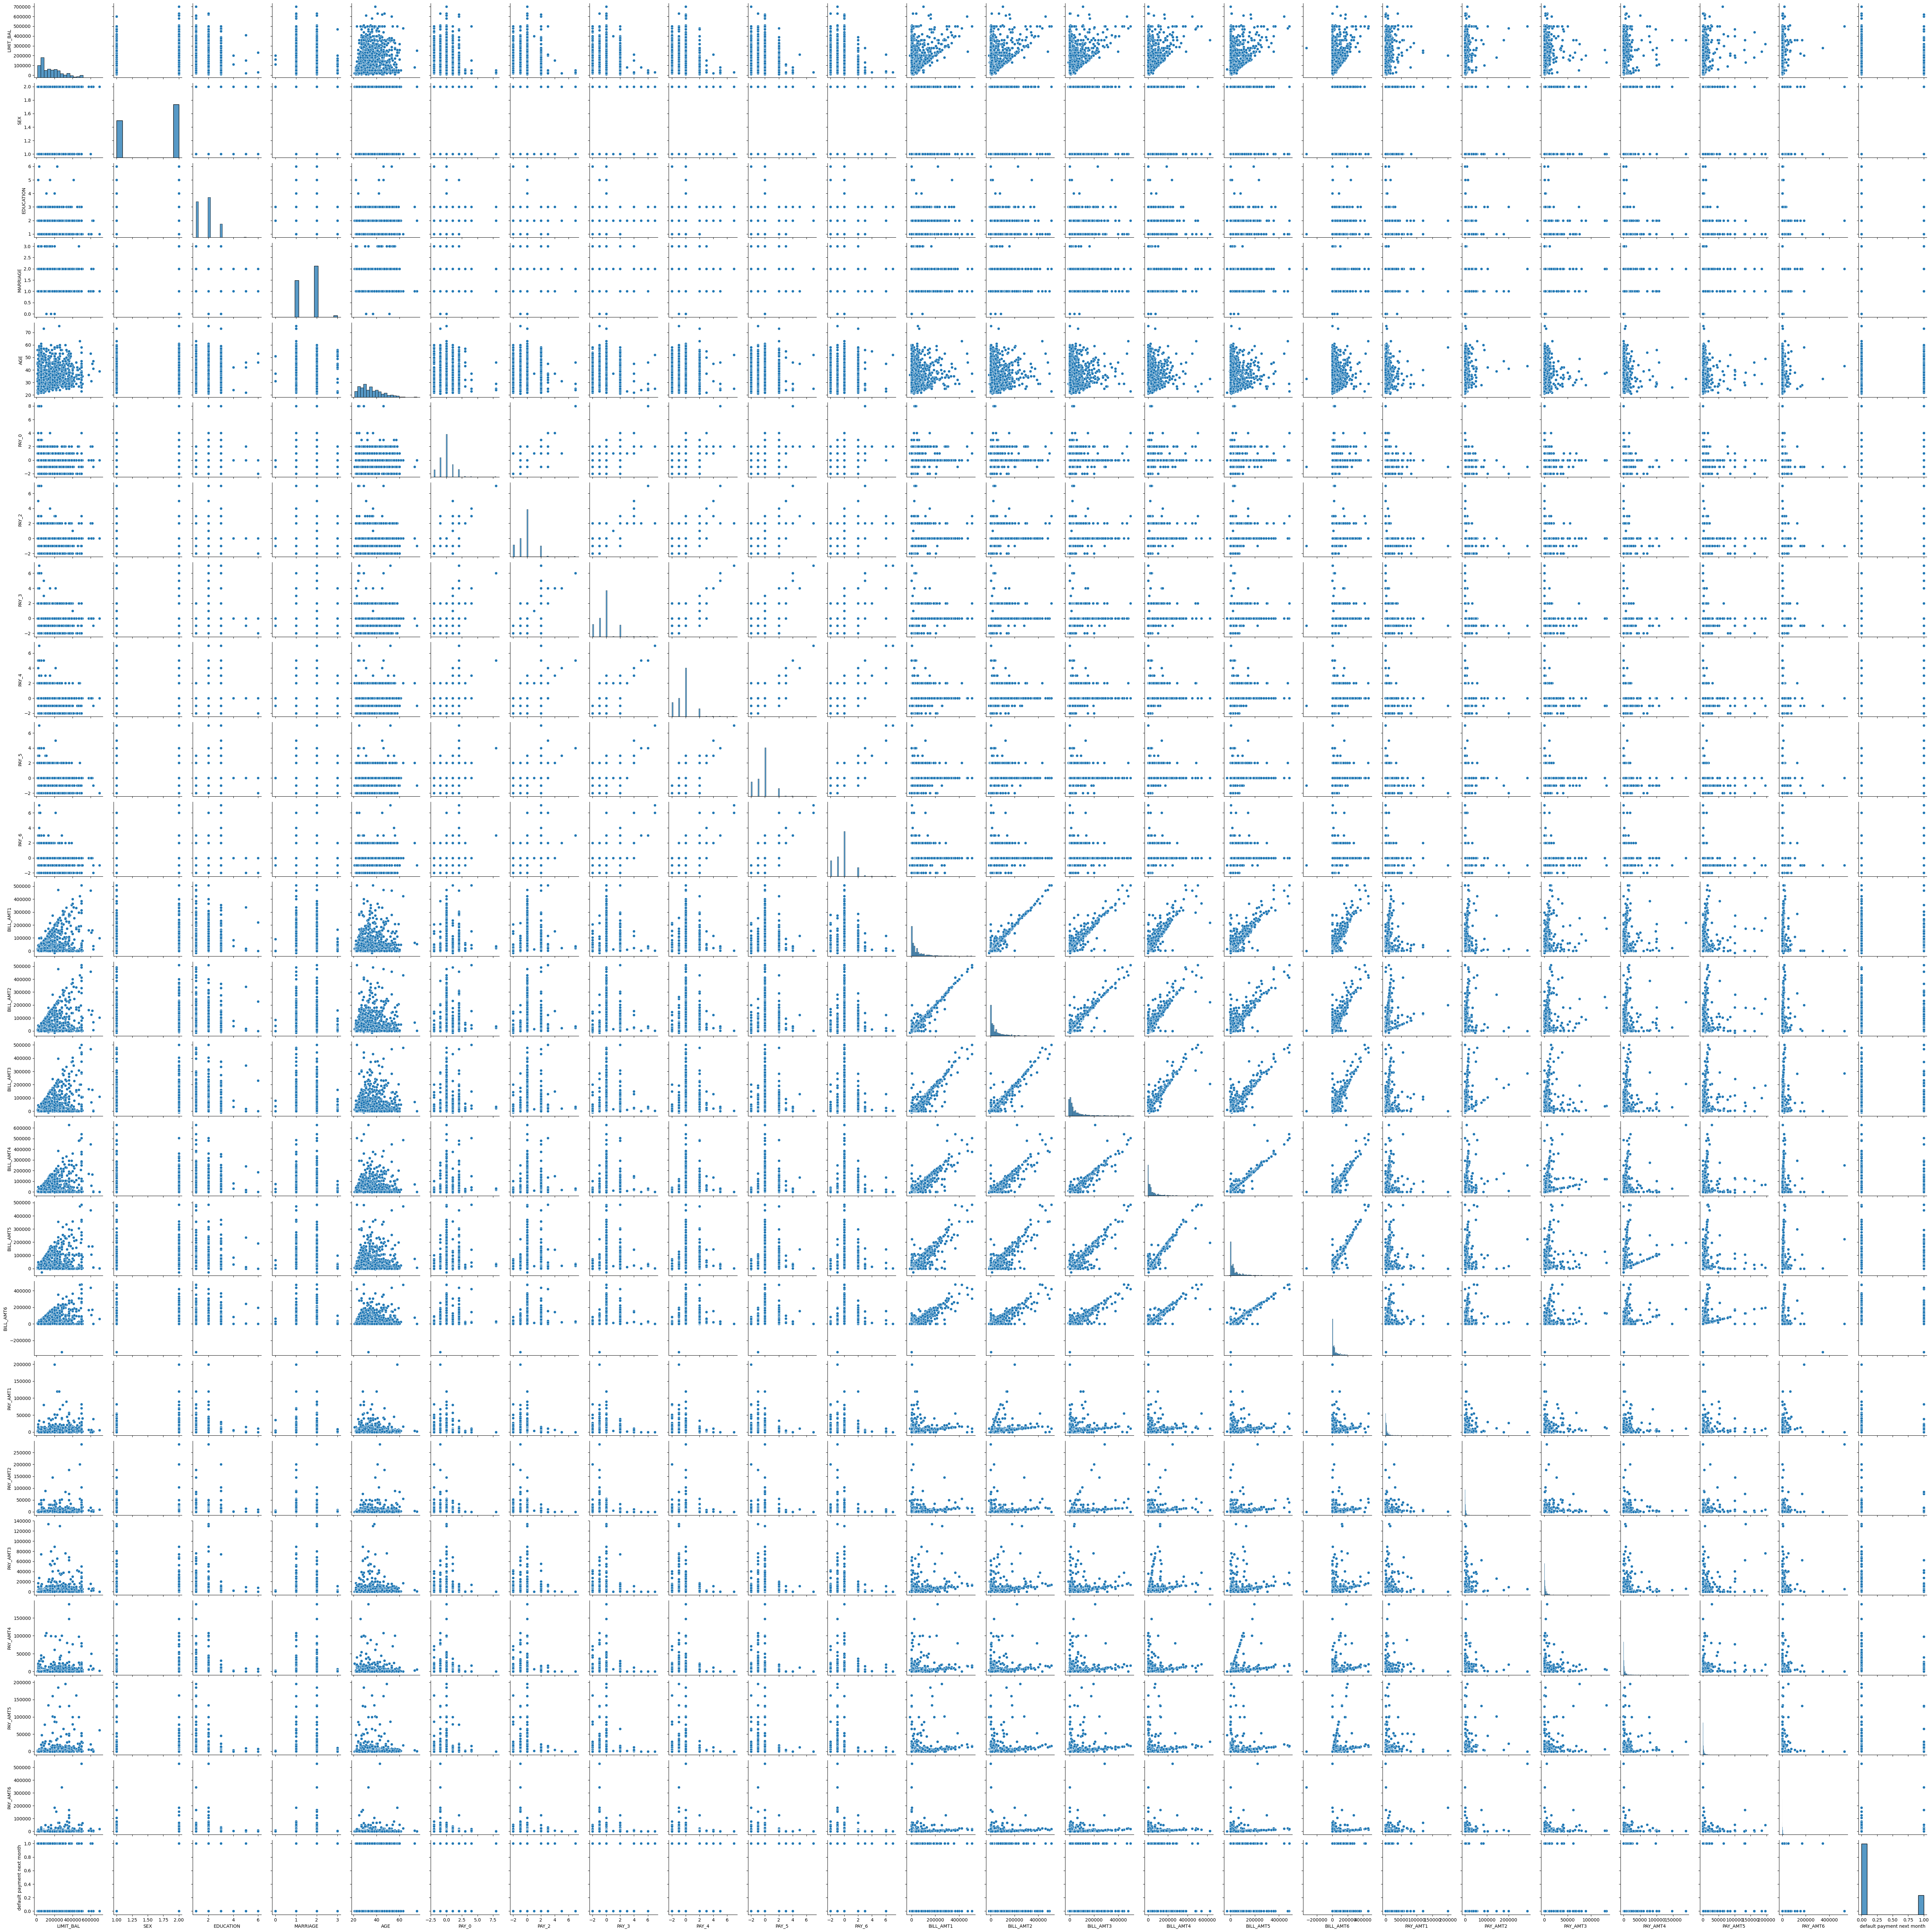

In [21]:
sns.pairplot(df)
plt.show()

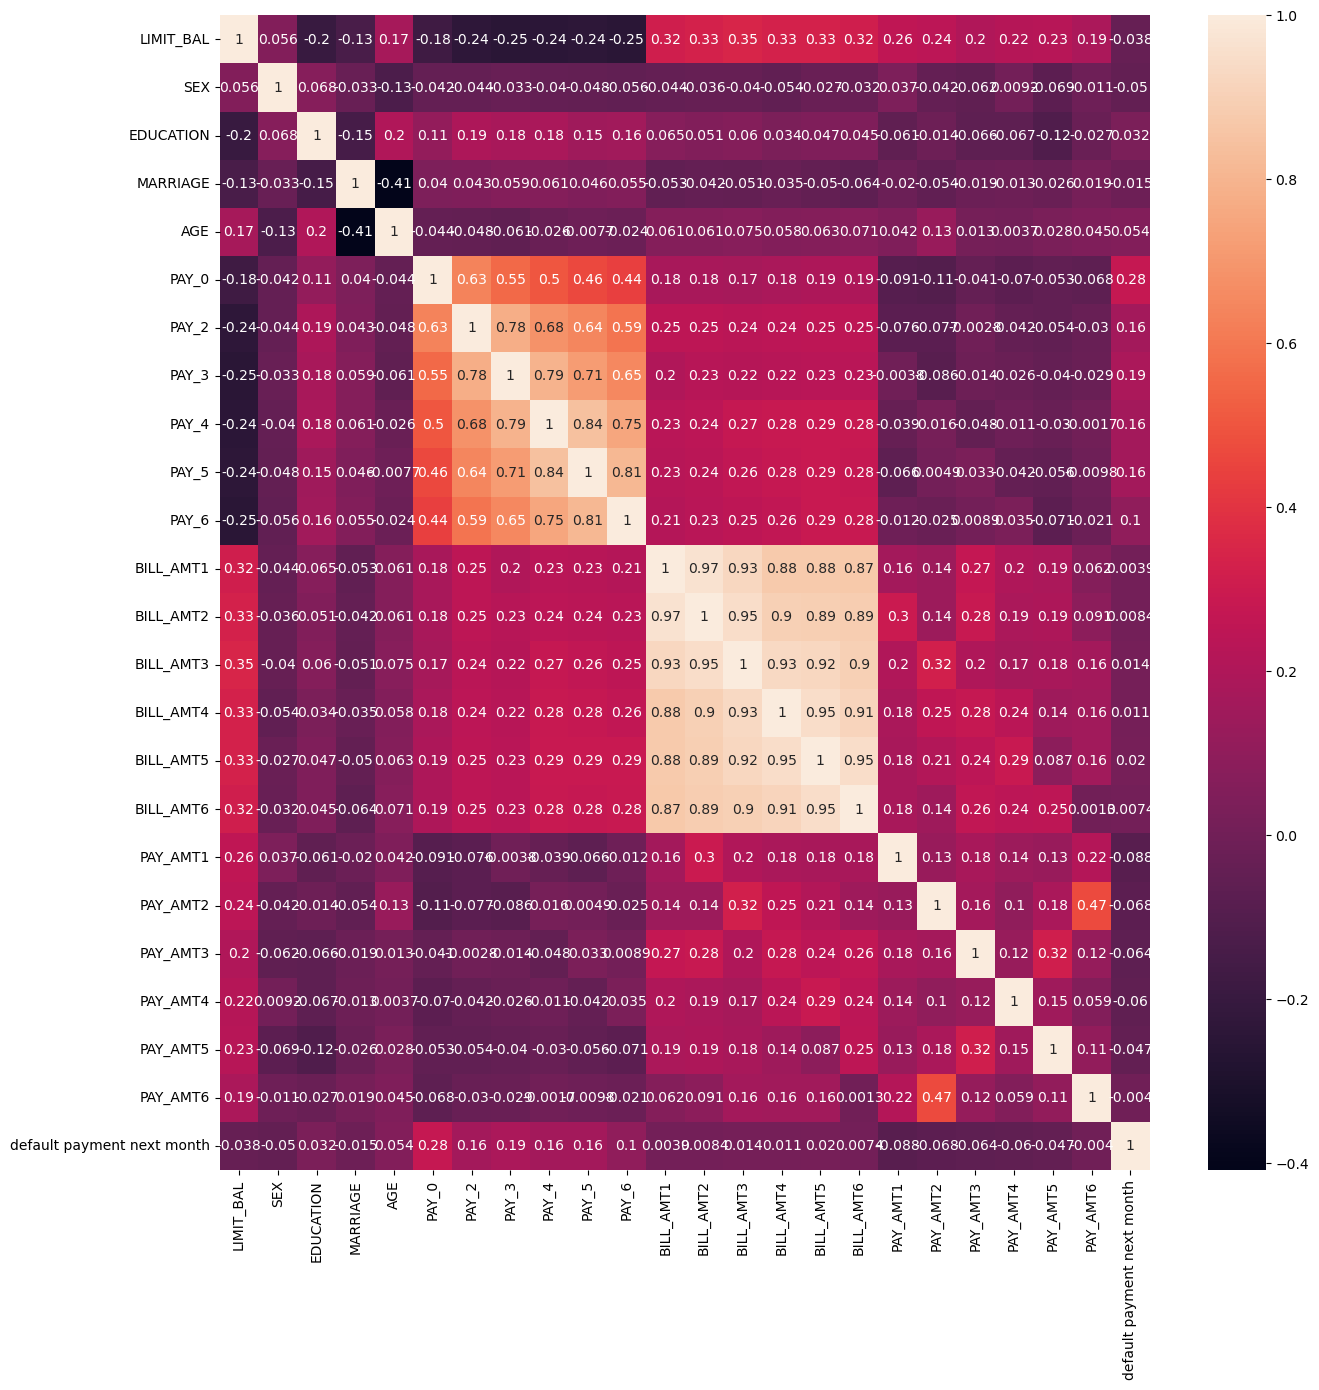

In [22]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.30, random_state=42)

In [24]:
from sklearn.preprocessing import StandardScaler
train_ss=StandardScaler()
test_ss=StandardScaler()

In [25]:
ss_X_train=train_ss.fit_transform(X_train)
ss_X_test=test_ss.fit_transform(X_test)


In [26]:
ss_X_train

array([[ 0.5414973 , -1.19959343, -1.03690208, ...,  0.30029822,
         0.14184692,  0.10485884],
       [ 0.46524541,  0.83361577, -1.03690208, ...,  0.50718682,
         0.08514383, -0.20352712],
       [-1.13604411,  0.83361577,  1.61696065, ..., -0.10330007,
        -0.22379799, -0.15947198],
       ...,
       [ 0.23648977, -1.19959343, -1.03690208, ..., -0.21890942,
        -0.1394184 , -0.09338928],
       [-0.67853282,  0.83361577, -1.03690208, ...,  2.94847233,
        -0.20692207, -0.12863339],
       [-0.67853282,  0.83361577,  0.29002928, ..., -0.26657656,
        -0.24348656, -0.15793005]])

In [27]:
scaled_train_df=pd.DataFrame(data=ss_X_train, columns=X_train.columns, index=X_train.index)

In [28]:
scaled_test_df=pd.DataFrame(data=ss_X_test, columns=X_test.columns, index=X_test.index)

In [29]:
scaled_train_df.head()

LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE     PAY_0     PAY_2  \
440   0.541497 -1.199593  -1.036902  0.745197  0.984139 -0.024032  0.123878   
482   0.465245  0.833616  -1.036902 -1.137973  0.767437 -0.865150 -0.671669   
422  -1.136044  0.833616   1.616961  0.745197  1.525896  1.658204  1.714973   
852  -0.983540  0.833616  -1.036902  0.745197 -0.641130 -0.024032  0.123878   
950  -0.449777  0.833616   0.290029 -1.137973  1.200842 -0.865150 -0.671669   

        PAY_3     PAY_4     PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
440  0.109884  0.221295  0.223339  ...   2.588845   2.258023   2.377089   
482 -0.675002 -0.620587 -0.626321  ...  -0.463000  -0.604306  -0.453815   
422  1.679655  1.905057  0.223339  ...  -0.464076  -0.424800  -0.379514   
852  1.679655  1.905057  1.922659  ...  -0.228934  -0.185449  -0.093730   
950 -0.675002 -0.620587 -0.626321  ...  -0.614688  -0.579783   1.040695   

     BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
440   2.533124  0.590897  0.209697  0.284428  0.300298  0.141847  0.104859  
482  -0.507899  0.867197  0.442410 -0.385675  0.507187  0.085144 -0.203527  
422  -0.358562 -0.217496 -0.210922 -0.385675 -0.103300 -0.223798 -0.159472  
852  -0.072109 -0.181671 -0.210922 -0.385675  0.052032 -0.235049 -0.203527  
950   1.092107 -0.293534 -0.173901 -0.230012  8.541995 -0.026912 -0.049334  

[5 rows x 23 columns]

In [30]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

model_nb=GaussianNB()
model_rf=RandomForestClassifier()

In [31]:
model_nb.fit(scaled_train_df, y_train)
model_rf.fit(scaled_train_df, y_train)

RandomForestClassifier()

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [33]:
y_pred_nb = model_nb.predict(scaled_test_df)
print('accuracy_score using GaussianNB is' , accuracy_score(y_test, y_pred_nb))

accuracy_score using GaussianNB is 0.6710963455149501


In [34]:
y_pred_rf=model_rf.predict(scaled_test_df)
print('accuracy_score using Random Forest is' , accuracy_score(y_test, y_pred_rf))

accuracy_score using Random Forest is 0.8372093023255814


In [35]:
print(confusion_matrix(y_test,y_pred_nb))
print(classification_report(y_test,y_pred_nb))

[[171  80]
 [ 19  31]]
              precision    recall  f1-score   support

           0       0.90      0.68      0.78       251
           1       0.28      0.62      0.39        50

    accuracy                           0.67       301
   macro avg       0.59      0.65      0.58       301
weighted avg       0.80      0.67      0.71       301



In [36]:
print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

[[243   8]
 [ 41   9]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       251
           1       0.53      0.18      0.27        50

    accuracy                           0.84       301
   macro avg       0.69      0.57      0.59       301
weighted avg       0.80      0.84      0.80       301



In [37]:
#hypertuning our gaussianNB model
from sklearn.model_selection import GridSearchCV
param_grid = {"var_smoothing": [1e-9,0.1, 0.001, 0.5,0.05,0.01,1e-8,1e-7,1e-6,1e-10,1e-11]}
#Creating an object of the Grid Search class
grid = GridSearchCV(estimator=model_nb, param_grid=param_grid, cv=5,  verbose=3)


In [38]:
#finding the best parameters
grid.fit(ss_X_train, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
[CV 1/5] END ...............var_smoothing=1e-09;, score=0.329 total time=   0.0s
[CV 2/5] END ...............var_smoothing=1e-09;, score=0.736 total time=   0.0s
[CV 3/5] END ...............var_smoothing=1e-09;, score=0.693 total time=   0.0s
[CV 4/5] END ...............var_smoothing=1e-09;, score=0.686 total time=   0.0s
[CV 5/5] END ...............var_smoothing=1e-09;, score=0.686 total time=   0.0s
[CV 1/5] END .................var_smoothing=0.1;, score=0.364 total time=   0.0s
[CV 2/5] END .................var_smoothing=0.1;, score=0.764 total time=   0.0s
[CV 3/5] END .................var_smoothing=0.1;, score=0.721 total time=   0.0s
[CV 4/5] END .................var_smoothing=0.1;, score=0.679 total time=   0.0s
[CV 5/5] END .................var_smoothing=0.1;, score=0.714 total time=   0.0s
[CV 1/5] END ...............var_smoothing=0.001;, score=0.329 total time=   0.0s
[CV 2/5] END ...............var_smoothing=0.001;

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 0.1, 0.001, 0.5, 0.05, 0.01,
                                           1e-08, 1e-07, 1e-06, 1e-10, 1e-11]},
             verbose=3)

In [39]:
grid.best_estimator_

GaussianNB(var_smoothing=0.5)

In [40]:
model_nb_new=GaussianNB(var_smoothing=0.5)
model_nb_new.fit(scaled_train_df, y_train)
y_pred_nb_new = model_nb_new.predict(scaled_test_df)
print('accuracy_score using GaussianNB is' , accuracy_score(y_test, y_pred_nb_new))
print(confusion_matrix(y_test,y_pred_nb_new))
print(classification_report(y_test,y_pred_nb_new))

accuracy_score using GaussianNB is 0.7807308970099668
[[216  35]
 [ 31  19]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       251
           1       0.35      0.38      0.37        50

    accuracy                           0.78       301
   macro avg       0.61      0.62      0.62       301
weighted avg       0.79      0.78      0.78       301



In [41]:
param_grid = {
                "n_estimators": [50,100, 130],
                "max_depth": range(3, 11, 1),
                "random_state":[0,50,100],
                "criterion": ['gini','entropy']
            }

# Creating an object of the Grid Search class
grid= GridSearchCV(model_rf,param_grid, verbose=3,cv=5)

In [42]:
grid.fit(scaled_train_df,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5] END criterion=gini, max_depth=3, n_estimators=50, random_state=0;, score=0.764 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, n_estimators=50, random_state=0;, score=0.764 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, n_estimators=50, random_state=0;, score=0.779 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, n_estimators=50, random_state=0;, score=0.793 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, n_estimators=50, random_state=0;, score=0.757 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, n_estimators=50, random_state=50;, score=0.779 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, n_estimators=50, random_state=50;, score=0.743 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, n_estimators=50, random_state=50;, score=0.779 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, n_estimators=50, random_state=50;, s

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 11),
                         'n_estimators': [50, 100, 130],
                         'random_state': [0, 50, 100]},
             verbose=3)

In [43]:
grid.best_estimator_

RandomForestClassifier(max_depth=9, random_state=100)

In [44]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 9, 'n_estimators': 100, 'random_state': 100}

In [49]:
model_rf_new=RandomForestClassifier(criterion= 'gini', max_depth= 9, n_estimators= 100, random_state= 100)
model_rf.fit(scaled_train_df, y_train)
y_pred_rf_new=model_rf.predict(scaled_test_df)
print('accuracy_score using Random Forest is' , accuracy_score(y_test, y_pred_rf_new))
print(confusion_matrix(y_test,y_pred_rf_new))
print(classification_report(y_test,y_pred_rf_new))

accuracy_score using Random Forest is 0.8338870431893688
[[236  15]
 [ 35  15]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       251
           1       0.50      0.30      0.37        50

    accuracy                           0.83       301
   macro avg       0.69      0.62      0.64       301
weighted avg       0.81      0.83      0.82       301

